# Import Python Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import two data set 
### 1. Customer Details as cust and 
### 2. Card Details as card

In [45]:
cust = pd.read_csv("C:\Technology\\HeroVired\\Capston\\Customer Details.csv", encoding='ISO-8859-1')

card = pd.read_csv(r"C:\Technology\\HeroVired\\Capston\\Card Details.csv", encoding='ISO-8859-1')


### Joining two datasets as data. Since both the datasets have distinct columns except CustomerID
### Here Concat funtion keys are not used since, both the datasets have same order and number of CustomerIDs

In [47]:
data = pd.concat([cust,card[['Income','Limit','Rating','Cards','Balance']]], axis=1)
data

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,Unmarried,Male,Caucasian,Bachelor,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,Married,Female,Caucasian,Senior High School,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,Unmarried,Male,Caucasian,Senior Secondary,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,Unmarried,Female,Caucasian,Bachelor,20.970,1356,161,2,0


### There is no missing value in dataset

In [48]:
data.isna().sum()

Name              0
CustomerID        0
Age               0
Marital Status    0
Gender            0
Ethnicity         0
Education         0
Income            0
Limit             0
Rating            0
Cards             0
Balance           0
dtype: int64

### No duplicate values

In [49]:
data[data.duplicated()]

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance


### Dataset data type
There are 6 categorical data and 6 numerical data

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32547 entries, 0 to 32546
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            32547 non-null  object 
 1   CustomerID      32547 non-null  object 
 2   Age             32547 non-null  int64  
 3   Marital Status  32547 non-null  object 
 4   Gender          32547 non-null  object 
 5   Ethnicity       32547 non-null  object 
 6   Education       32547 non-null  object 
 7   Income          32547 non-null  float64
 8   Limit           32547 non-null  int64  
 9   Rating          32547 non-null  int64  
 10  Cards           32547 non-null  int64  
 11  Balance         32547 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 3.0+ MB


### Unique value in dataset

In [52]:
data.nunique()

Name              24942
CustomerID        32547
Age                  62
Marital Status        5
Gender                2
Ethnicity             3
Education             8
Income            24384
Limit              7443
Rating              679
Cards                 7
Balance            1570
dtype: int64

From the above data only "Age, Income, Limit, Rating, Balance" are quantitative continuous variables
<br>whereas "Cards, " is quantitative Discrete variables
<br>From above data CustomerID is removed from mode as there will be no repetative values and all values are unique
<br>From the data above "Marital Status, Gender, Ethnicity" are qualitative Nominal data
<br>where as "Education" is qualitative Ordinal data
<br>Above observation is done using data description given and finding value_count of the variables

### Statistic summary of numerical data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Limit'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Cards'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

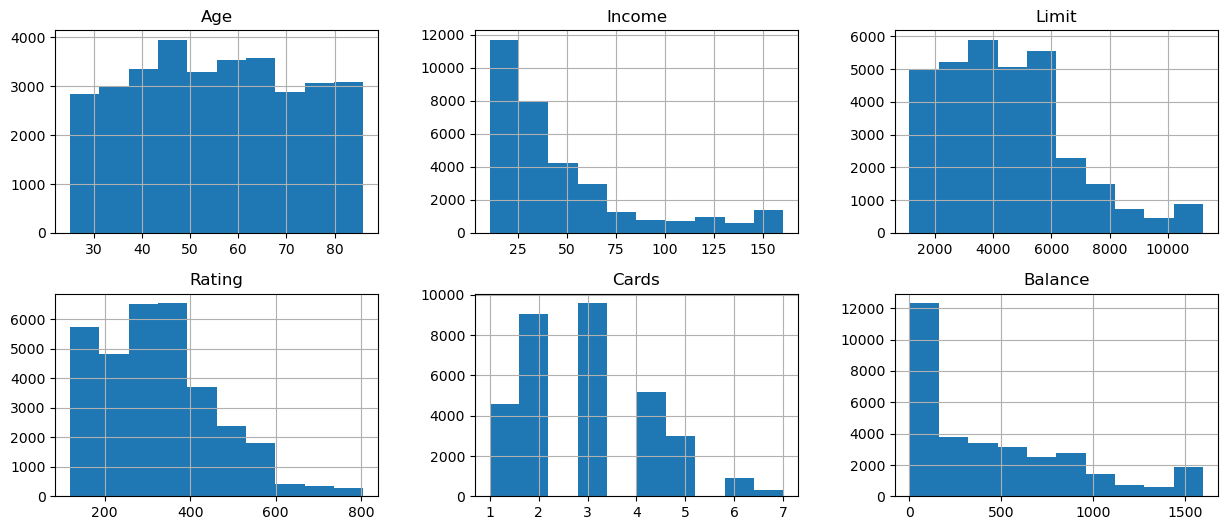

In [69]:
data.hist(figsize=(15,30),layout=(9,3))

In [51]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,32547.0,55.48,16.99,25.00,42.00,55.00,69.00,86.00
Income,32547.0,46.49,37.14,10.63,20.66,33.47,58.08,160.23
Limit,32547.0,4419.52,2202.44,1134.00,2727.00,4178.00,5636.00,11200.00
Rating,32547.0,326.72,136.15,119.00,224.00,316.00,405.00,805.00
Cards,32547.0,2.91,1.33,1.00,2.00,3.00,4.00,7.00
Balance,32547.0,447.89,454.21,0.00,5.00,331.00,749.00,1597.00


From the statistics summary, we can infer the below findings :
<br>1. Card holders age is between 25 - 86 years. Most of the card holders are mid-age to senior citizen.
<br>2. Income-wise most card holders are in 20-60Lakhs cap. However, there is group earning higher income which must be target separately for more service and facilities.
<br>3. Card limits mostly lies between 27 - 56Lakhs. There are card holder with 1 Crores Limit need to reviewed with their spending.
<br>4. Most of card holders are not having good ratings ranging between 200 - 400. However, there are card holders with excellent rating to be consider for Limit update.
<br>5. Number of Card holders has mostly 2-4 cards.
<br>6. Most of the card holders have low balance.

### Statistic summary of categorical data

Categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing card limits.

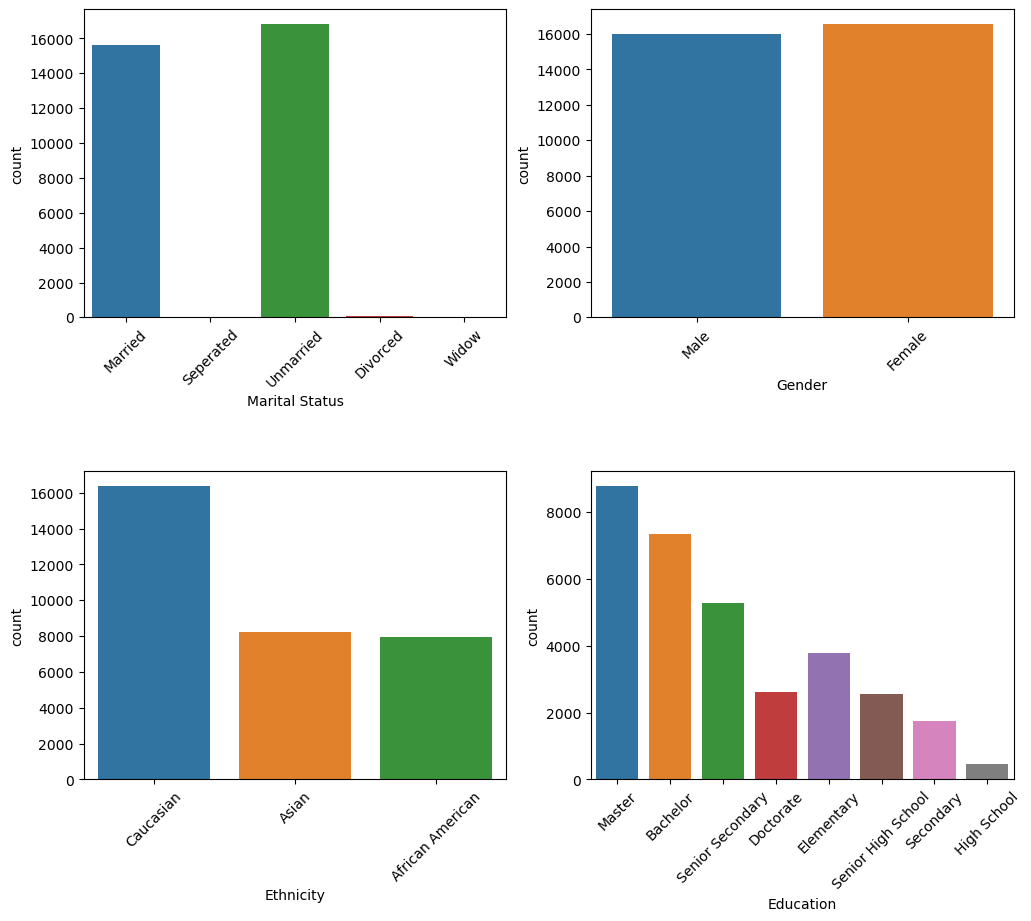

In [70]:
feature = ['Marital Status', 'Gender', 'Ethnicity', 'Education']

fig=plt.subplots(figsize=(12,10))

for p,q in enumerate(feature):
    plt.subplot(2,2,p+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=q,data=data)
    plt.xticks(rotation=45)

In [68]:
data.describe(include='object').T

,count,unique,top,freq
Name,32547,24942,Claude,9
CustomerID,32547,32547,0002-ORFBO,1
Marital Status,32547,5,Unmarried,16829
Gender,32547,2,Female,16562
Ethnicity,32547,3,Caucasian,16380
Education,32547,8,Master,8781


From the statistics summary, we can infer the below findings :
<br>1. Similar card holder names are existing where Claude appears 9 times.
<br>2. Dataset data is unique as each card holder has unique Customer ID.
<br>3. Most of the customer are Unmarried, Female and from Caucasian.
<br>4. Most of the customer are highly educated holding Master degree.

### The measures of central tendency for all the variables

In [55]:
#Continuous variables
continuous = ['Age','Income','Limit','Rating','Balance']

#Discrete variables
discrete = ['Cards']

#Nominal Variables
nominal = ['Marital Status', 'Gender', 'Ethnicity']

#Ordinal Variables
ordinal = ['Education']

#The measures of central tendency for all the quantitative variables which are continuous
meancv = round(data[['Age','Income','Limit','Rating','Balance']].mean(),2)
mediancv = round(data[['Cards']].median(),2)
modedv = round(data[['Marital Status', 'Gender', 'Ethnicity','Education']].mode().T,2)

print('*'*30)
print(f'Mean of the below varibles:\n {meancv}')
print('*'*30)
print(f'Median of the below variables:\n{mediancv}')
print('*'*30)
print(f'Mode of below variables:\n{modedv}')
print('*'*30)

******************************
Mean of the below varibles:
 Age          55.48
Income       46.49
Limit      4419.52
Rating      326.72
Balance     447.89
dtype: float64
******************************
Median of the below variables:
Cards    3.0
dtype: float64
******************************
Mode of below variables:
                        0
Marital Status  Unmarried
Gender             Female
Ethnicity       Caucasian
Education          Master
******************************


### Outliers in dataset

In [56]:
# Quartile 1 of all the numerical variables

Q1=round(data[['Age','Income','Limit','Rating','Balance','Cards']].quantile(.25),2)
Q1

Age          42.00
Income       20.66
Limit      2727.00
Rating      224.00
Balance       5.00
Cards         2.00
Name: 0.25, dtype: float64

In [57]:
# Quartile 3 of all the numerical variables

Q3=round(data[['Age','Income','Limit','Rating','Balance','Cards']].quantile(.75),2)
Q3

Age          69.00
Income       58.08
Limit      5636.00
Rating      405.00
Balance     749.00
Cards         4.00
Name: 0.75, dtype: float64

In [58]:
# Inter Quartile Range for all variables

IQR = Q3 - Q1
IQR

Age          27.00
Income       37.42
Limit      2909.00
Rating      181.00
Balance     744.00
Cards         2.00
dtype: float64

In [59]:
# Lower limit for all variables

lower_limit=Q1-1.5*IQR
lower_limit

Age           1.50
Income      -35.47
Limit     -1636.50
Rating      -47.50
Balance   -1111.00
Cards        -1.00
dtype: float64

In [60]:
# Upper limit for all variables

upper_limit=Q3+1.5*IQR
upper_limit

Age         109.50
Income      114.21
Limit      9999.50
Rating      676.50
Balance    1865.00
Cards         7.00
dtype: float64

In [61]:
# Outlier above upper limit for appropriate variables

Upper_Outlier=data.max() - upper_limit
Upper_Outlier

Age                -23.5
Balance           -268.0
Cards                0.0
CustomerID           NaN
Education            NaN
Ethnicity            NaN
Gender               NaN
Income            46.021
Limit             1200.5
Marital Status       NaN
Name                 NaN
Rating             128.5
dtype: object

In [62]:
# In this outlier result only positive value to be considered as it is above upper limit.

Upper_Outlier_Result=data[['Age','Income','Limit','Rating','Balance','Cards']].max()-upper_limit
Upper_Outlier_Result

Age         -23.500
Income       46.021
Limit      1200.500
Rating      128.500
Balance    -268.000
Cards         0.000
dtype: float64

In [63]:
num_var = data.select_dtypes(include = "number").columns
num_var

Index(['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance'], dtype='object')

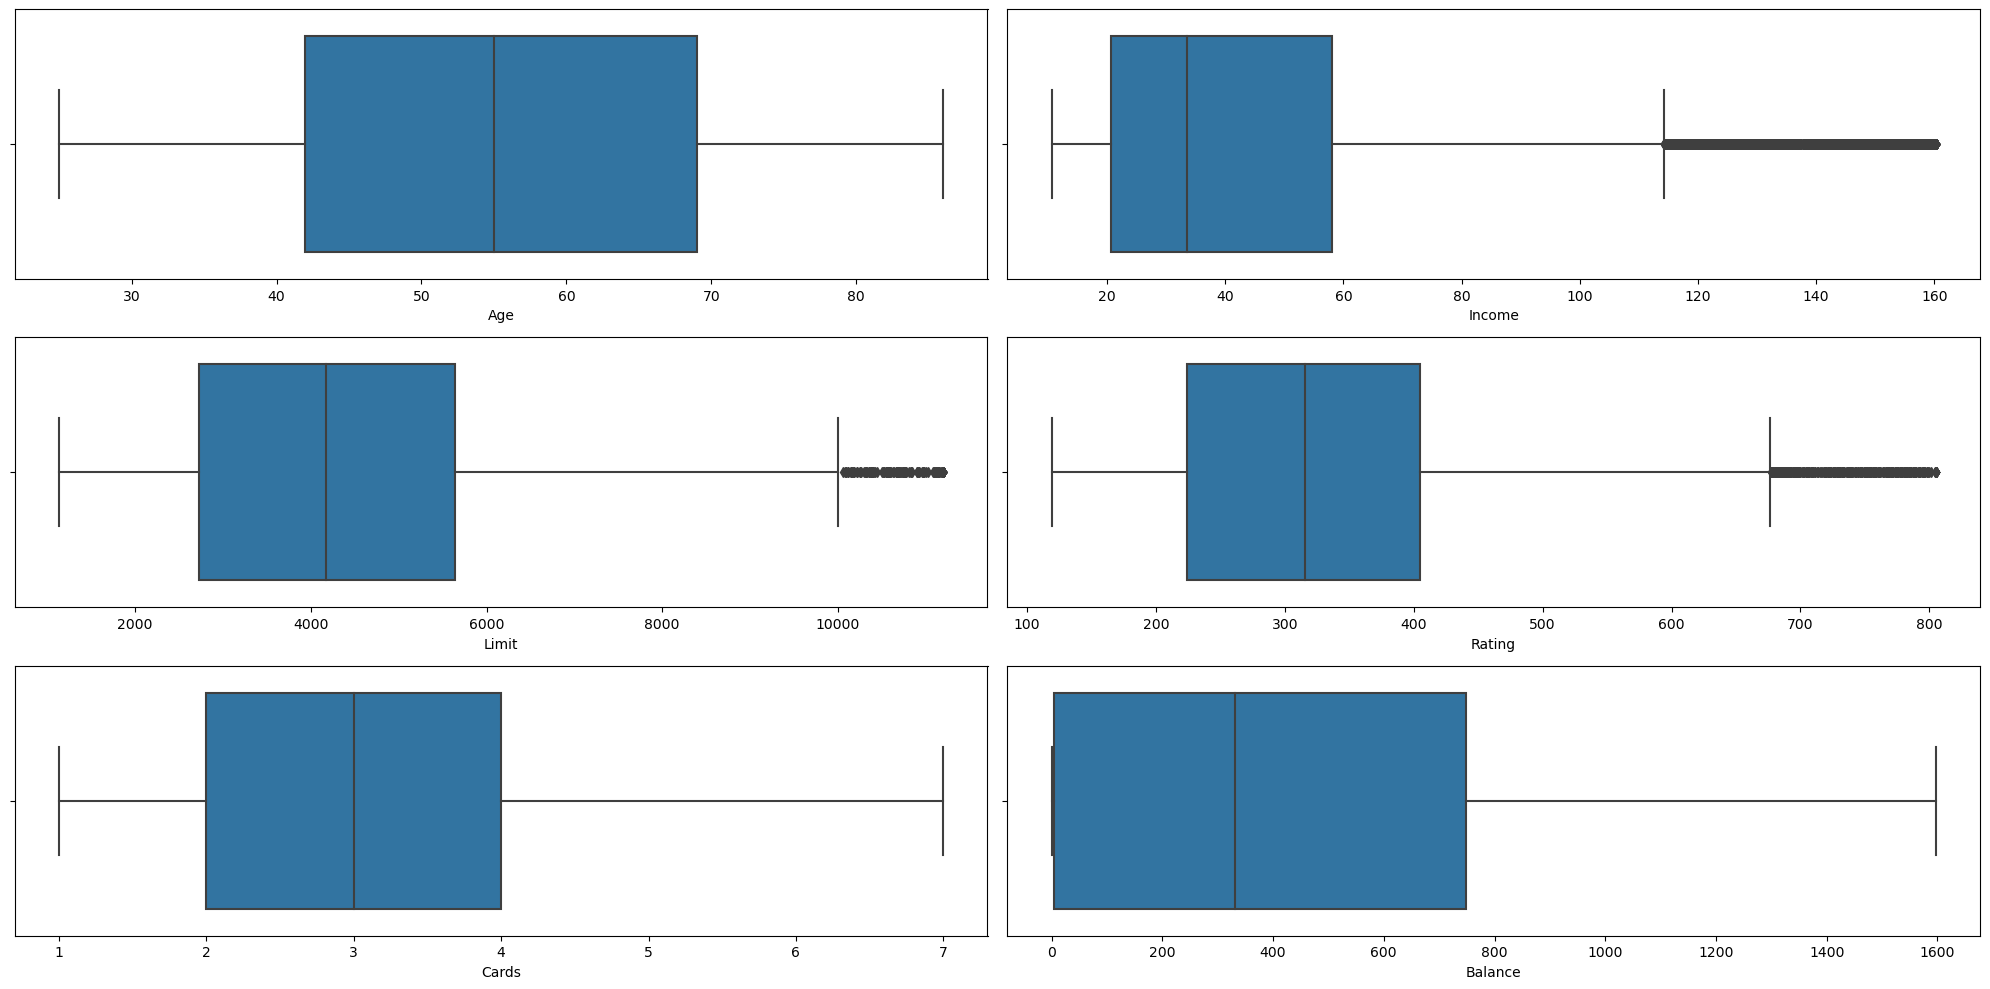

In [64]:
# Box plot is suitable for showcasing outlier. Here we have one variables for showcasing outlier in Employee Attrition Modelling dataset

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(20,10))
ax = ax.flatten()

for i, col in enumerate(num_var):
    sns.boxplot(data=data, x= col, ax=ax[i])
    
plt.tight_layout()

Number of Cards, Age and Balance have no outliers
<br>Income, Limit and Rating have outliers

In [ ]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

### Number of outlier in Income

In [65]:
outliers = find_outliers_IQR(data['Income'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 3036
max outlier value: 160.231
min outlier value: 114.232


Income outliers are almost 9% of total data and should be consider for EDA. There are individual with higher income.

### Number of outlier in Limit

In [66]:
outliers = find_outliers_IQR(data['Limit'])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 895
max outlier value: 11200
min outlier value: 10063


Limit outliers are 2.7% of dataset and not too much far from upper limit, should be consider for EDA.

### Number of outlier in Rating

In [67]:
outliers = find_outliers_IQR(data['Rating'])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 571
max outlier value: 805
min outlier value: 677


Rating outliers are 1.8% of dataset and are above upper limit. Higher rating is not unusual and should be consider for EDA.
<br>
<br>Hence, the dataset is clean and fine for analysis.